In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial as factorial
import pandas as pd
from tqdm import tqdm
import seaborn as sn
import sys
from pathlib import Path
import matplotlib as mpl

# import custom functions from src folder
module_path = str(Path.cwd() / "../src")

if module_path not in sys.path:
    sys.path.append(module_path)

from util import *

In [19]:
nxMC = [20, 100, 200]
nr1MC = [20, 50, 200]

R2 = 7
k_red = 15
k_blue = 5
R1_min = 0
scale = 1
vary_a1 = False
vary_R2 = False #Not adapted for this yet
p_red = 0.5
tag = f'r2_{R2}_kr{k_red}_kb{k_blue}_r1min{R1_min}_s{scale}_vary_r2_{vary_R2}_vary_a1_{vary_a1}_pRed_{p_red}'

#datafiles = [f"analytical_solution_x1_x2_grid_nxMC_{n}_nr1MC_50.csv" for n in nxMC]
datafiles = [f"analytical_solution_x1_x2_grid_{tag}_nxMC_{nxMC[i]}_nr1MC_{nr1MC[i]}.csv" for i in range(len(nr1MC))]

#datafile = "analytical_solution_grid_100x100_nMC_10.csv"
data_df = [pd.read_csv(file) for file in datafiles]


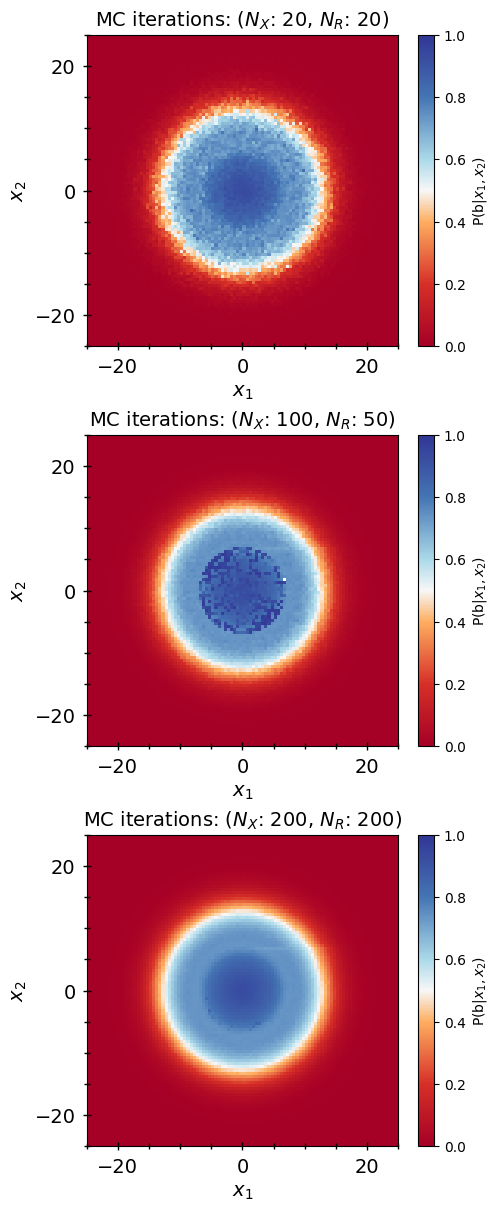

In [20]:
fig, axs = plt.subplots(nrows=(len(nxMC)), ncols=1, figsize= (5, 4*len(nxMC)), layout="constrained")
for i in range(len(nxMC)):
    if len(nxMC) > 1:
        ax = axs[i]
    else:
        ax = axs
    data = data_df[i]
    ax = plot_grid(data, "P_blue_given_x", ax, 100)
    cmap = red_blue_cmap()
    #Plot settings
    hue_norm = mpl.colors.Normalize(vmin=0, vmax=1, clip=False)
    ax.set_title(rf"MC iterations: ($N_X$: {nxMC[i]}, $N_R$: {nr1MC[i]})", fontsize=14)
    fig.colorbar(mpl.cm.ScalarMappable(norm=hue_norm, cmap=cmap), label=r'P(b|$x_1, x_2$)', ax=ax)
    ax.set_xlabel(r"$x_1$", fontsize=14)
    ax.set_ylabel(r"$x_2$", fontsize=14)
    ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
    ax.tick_params(which="major", length=6)
    ax.minorticks_on()
    ax.set_aspect('equal', adjustable='box')

In [21]:
# Read files
train_n = 50000
trainfile = f"train_n_{train_n}_{tag}"
train_data = pd.read_csv(f"../data/{trainfile}.csv")

Estimated optimal accuracy: 0.7884062764879783


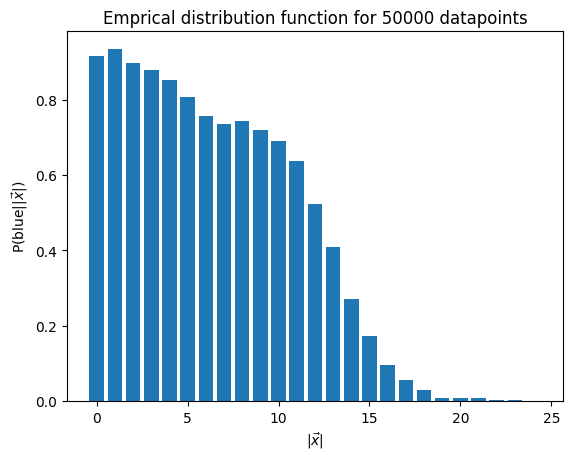

In [22]:
red_rx = train_data[train_data["color"] == "red"]["r_x"].values
blue_rx = train_data[train_data["color"] == "blue"]["r_x"].values
red_count, red_bins = np.histogram(red_rx, bins=25, range=(0, 25))
blue_count, blue_bins = np.histogram(blue_rx, bins=25, range=(0, 25))
fraction_blue = np.array([(blue_count[i])/(red_count[i]+blue_count[i]) for i in range(len(red_count))])
fraction_red = 1 - fraction_blue
plt.bar(red_bins[0:-1], fraction_blue)
plt.title(f"Emprical distribution function for {len(train_data)} datapoints")
plt.xlabel(r"$|\vec{x}|$")
plt.ylabel(r"P(blue||$\vec{x}$|)")
acc = np.array([max(fraction_blue[i], fraction_red[i])*(red_count[i]+blue_count[i])/sum(red_count + blue_count) for i in range(len(red_count))])
max_acc = sum(acc[~np.isnan(acc)])
print(f"Estimated optimal accuracy: {max_acc}")

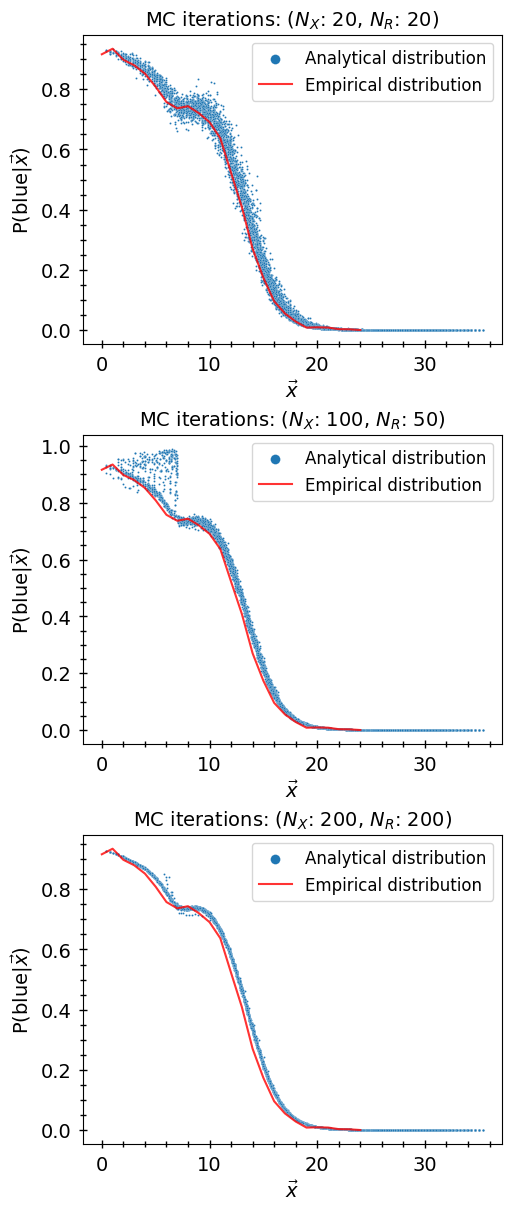

In [23]:
fig, axs = plt.subplots(nrows=(len(nxMC)), ncols=1, figsize= (5, 4*len(nxMC)), layout="constrained")
for i in range(len(nxMC)):
    file = datafiles[i]
    if len(nxMC) > 1:
        ax = axs[i]
    else:
        ax = axs
    sn.scatterplot(data_df[i], x="r_x", y="P_blue_given_x", s=2, ax = ax, label="Analytical distribution")
    
    ax.plot(red_bins[0:-1], fraction_blue, label="Empirical distribution", color="red", alpha=0.8)
    ax.set_title(rf"MC iterations: ($N_X$: {nxMC[i]}, $N_R$: {nr1MC[i]})", fontsize=14)
    ax.set_xlabel(r"$\vec{x}$", fontsize=14)
    ax.set_ylabel(r"P(blue|$\vec{x}$)", fontsize=14)
    ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
    ax.tick_params(which="major", length=6)
    ax.minorticks_on()
    ax.legend(markerscale=5, fontsize=12)

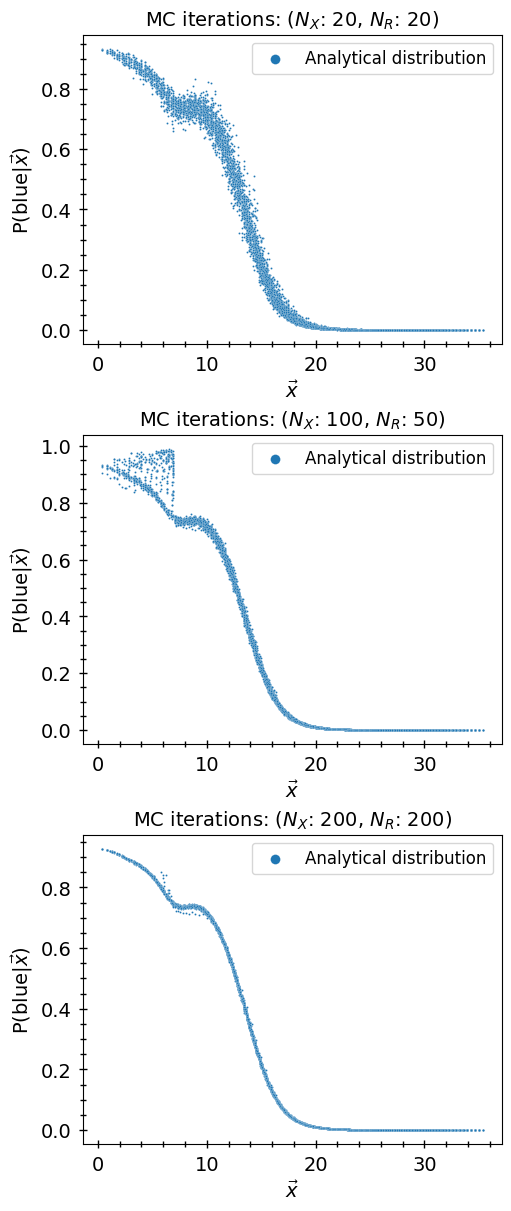

In [24]:
fig, axs = plt.subplots(nrows=(len(nxMC)), ncols=1, figsize= (5, 4*len(nxMC)), layout="constrained")
for i in range(len(nxMC)):
    file = datafiles[i]
    if len(nxMC) > 1:
        ax = axs[i]
    else:
        ax = axs
    sn.scatterplot(data_df[i], x="r_x", y="P_blue_given_x", s=2, ax = ax, label="Analytical distribution")
    ax.set_title(rf"MC iterations: ($N_X$: {nxMC[i]}, $N_R$: {nr1MC[i]})", fontsize=14)
    ax.set_xlabel(r"$\vec{x}$", fontsize=14)
    ax.set_ylabel(r"P(blue|$\vec{x}$)", fontsize=14)
    ax.tick_params(which="both", direction="inout", bottom=True, left=True, labelsize=14, pad=5, length=4, width=1)
    ax.tick_params(which="major", length=6)
    ax.minorticks_on()
    ax.legend(markerscale=5, fontsize=12)